In [8]:
import pandas as pd

# 替換為你的檔案路徑
bank = pd.read_csv('BankChurners.csv')

# 顯示前五筆資料
print(bank.head())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 15.1/15.1 MB 4.3 MB/s eta 0:00:00



You should consider upgrading via the 'c:\Users\Michael\Desktop\檔案\碩士班\碩一課程\碩一下\Data Science\Final\group4-bank-churn-prediction-\venv\Scripts\python.exe -m pip install --upgrade pip' command.


c:\Users\Michael\Desktop\檔案\碩士班\碩一課程\碩一下\Data Science\Final\group4-bank-churn-prediction-\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature: CLIENTNUM                           |▍         | [  4%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

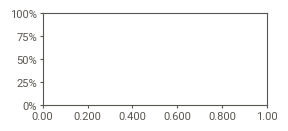

In [11]:
import pandas as pd
import sweetviz as sv

report = sv.analyze(bank)
report.show_html("sweetviz_report.html")


In [13]:
# Drop 掉 Naive Bayes 模型自動產生的預測欄位
# 這是過去別的機器學習跑的資料所以要drop
bank = bank.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [16]:
from sklearn.model_selection import train_test_split

target = 'Attrition_Flag'

X_train, X_test, y_train, y_test = train_test_split(
    bank.drop(columns=[target]),
    bank[target],
    test_size=0.2,
    stratify=bank[target],
    random_state=42
)

# 顯示流失率
print("原始資料流失率:\n", bank[target].value_counts(normalize=True))
print("\n訓練資料流失率:\n", y_train.value_counts(normalize=True))
print("\n測試資料流失率:\n", y_test.value_counts(normalize=True))

# 合併欄位並匯出
train_df = X_train.copy()
train_df[target] = y_train
test_df = X_test.copy()
test_df[target] = y_test

train_df.to_csv("bank_train.csv", index=False)
test_df.to_csv("bank_test.csv", index=False)


原始資料流失率:
 Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

訓練資料流失率:
 Existing Customer    0.839279
Attrited Customer    0.160721
Name: Attrition_Flag, dtype: float64

測試資料流失率:
 Existing Customer    0.839585
Attrited Customer    0.160415
Name: Attrition_Flag, dtype: float64


指令已執行：成功移除指定的 Naive Bayes 欄位。
指令已執行：成功移除 CLIENTNUM 欄位。
指令已執行：已將所有分類特徵轉換為數值。

準備就緒，正在計算相關性矩陣並繪圖...


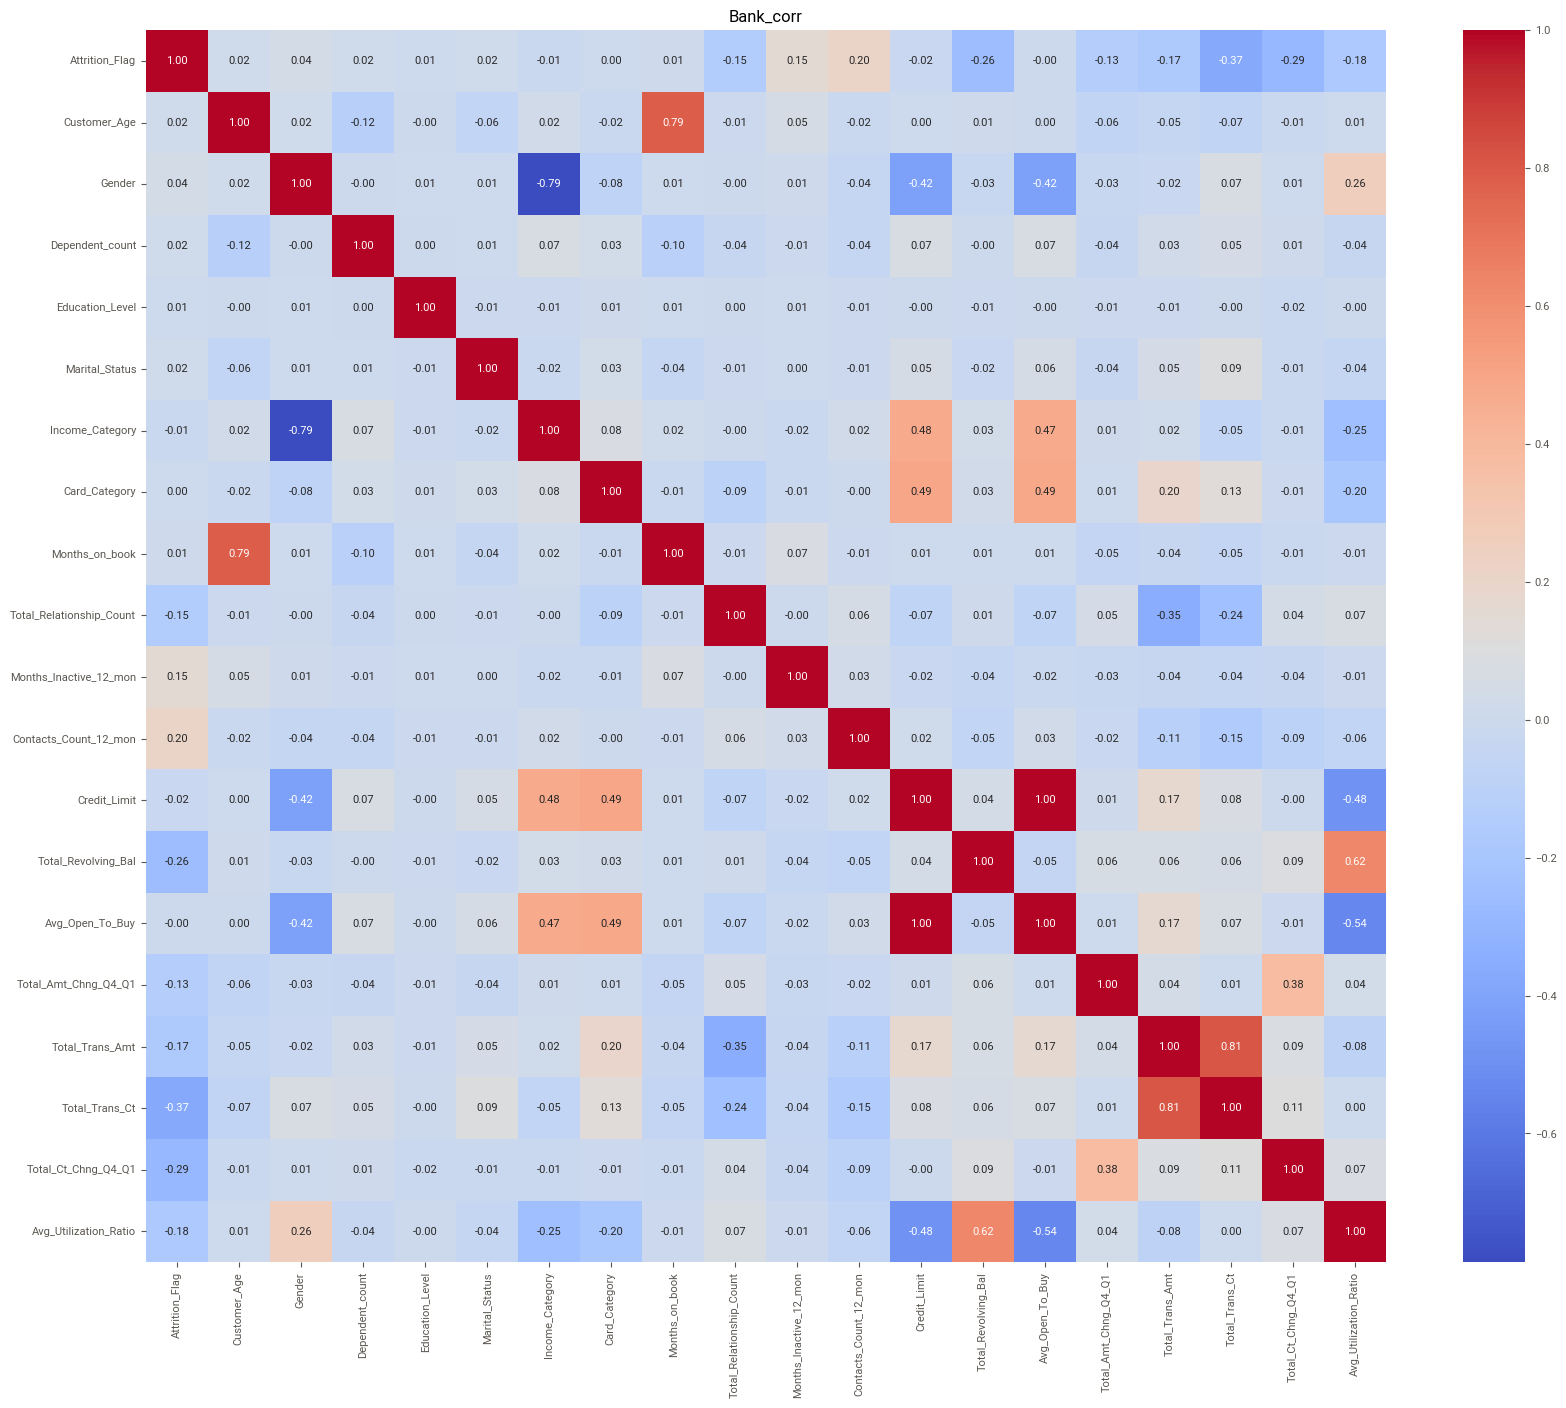

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 根據您的指示，我們在進行任何分析前，先確保移除指定的欄位。

# 1. 為了不影響您原始的 bank 物件，我們先建立一個副本
df_final_corr = bank.copy()

# 2. 定義您指定不要的原始欄位 (最後兩行)
columns_to_remove = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

# 3. 檢查這些欄位是否存在，如果存在就移除它們
#    這樣即使您已經 drop 過了，再次執行也不會報錯。
existing_columns = [col for col in columns_to_remove if col in df_final_corr.columns]
if existing_columns:
    df_final_corr.drop(columns=existing_columns, inplace=True)
    print("指令已執行：成功移除指定的 Naive Bayes 欄位。")
else:
    print("檢查：指定的 Naive Bayes 欄位已經被移除。")

# 4. 同時也移除無關的客戶ID
if 'CLIENTNUM' in df_final_corr.columns:
    df_final_corr.drop(columns=['CLIENTNUM'], inplace=True)
    print("指令已執行：成功移除 CLIENTNUM 欄位。")

# 5. 將所有剩下的「分類特徵」轉換為數值，以便計算相關性
df_final_corr['Attrition_Flag'] = df_final_corr['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df_final_corr['Gender'] = df_final_corr['Gender'].map({'M': 0, 'F': 1})
education_map = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
df_final_corr['Education_Level'] = df_final_corr['Education_Level'].map(education_map)
income_map = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
df_final_corr['Income_Category'] = df_final_corr['Income_Category'].map(income_map)
card_map = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
df_final_corr['Card_Category'] = df_final_corr['Card_Category'].map(card_map)
df_final_corr['Marital_Status'], _ = pd.factorize(df_final_corr['Marital_Status'])
print("指令已執行：已將所有分類特徵轉換為數值。")

# 6. 計算相關性矩陣並繪製熱力圖
print("\n準備就緒，正在計算相關性矩陣並繪圖...")
corr_matrix = df_final_corr.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Bank_corr')
plt.show()